In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

plt.style.use('seaborn')
sns.set(font_scale=2.5)
%matplotlib inline
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

from keras import models, layers
from keras import Input
from keras.models import Model, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers, initializers, regularizers, metrics
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
from keras.layers import BatchNormalization, Conv2D, Activation, Dense, GlobalAveragePooling2D, MaxPooling2D, ZeroPadding2D, Add
 
import os
import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 5s 0us/step


In [ ]:
x_train.shape[0]

50000

In [ ]:
y_train = keras.utils.to_categorical(y_train, 10)#10 meaing n_classes
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
y_train.shape

(50000, 10)

In [ ]:
x_train,x_val,y_train,y_val = train_test_split(x_train, y_train, test_size=0.2)

In [ ]:
x_train.shape

(40000, 32, 32, 3)

In [ ]:
y_train.shape

(40000, 10)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


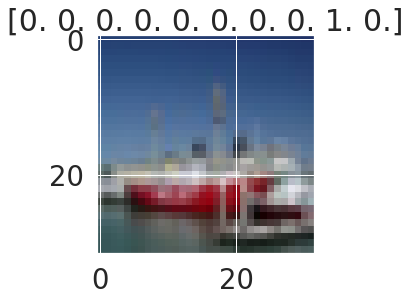

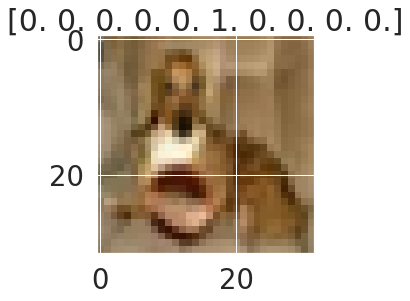

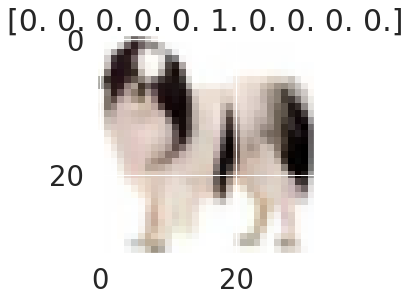

In [ ]:
for i in range(3):
  plt.title(y_train[i])
  plt.imshow(x_train[i])
  plt.show()

In [ ]:
train_datagen = ImageDataGenerator(
  rescale = 1./255.,
  width_shift_range= 0.2,
  zoom_range = 0.3,
  horizontal_flip = True
)
val_datagen = ImageDataGenerator(
  rescale = 1./255.
)
test_datagen = ImageDataGenerator(
  rescale = 1./255.
)

In [ ]:
train_generator = train_datagen.flow(
    x_train,y_train,
    batch_size= 32
)
validation_generator = val_datagen.flow(
    x_val,y_val,
    batch_size= 32
)
test_genrator = test_datagen.flow(
    x_test,y_test,
    batch_size= 32
)

In [ ]:
lrr= ReduceLROnPlateau(monitor='val_accuracy',
                       factor=.01, 
                       patience=3, 
                       min_lr=1e-5) 

# Modeling (Fine Tuning)
* ResNet trainable = True
* ResNet trainable[@:] = True
* ResNet self code

#### ResNet trainable = True

In [ ]:
model = ResNet50(weights='imagenet',include_top=False,input_shape=(32,32,3))
model.trainable = True
model.summary()

94773248/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
__________________________

In [ ]:
top_model = keras.Sequential()
top_model.add(model)
top_model.add(layers.Flatten())
top_model.add(layers.Dense(1024, activation='relu'))
top_model.add(layers.Dense(512, activation='relu'))
top_model.add(layers.Dropout(0.4))
top_model.add(layers.Dense(256, activation='relu'))
top_model.add(layers.Dropout(0.3))
top_model.add(layers.Dense(128, activation='relu'))
top_model.add(layers.Dropout(0.2))
top_model.add(layers.Dense(10, activation='softmax'))

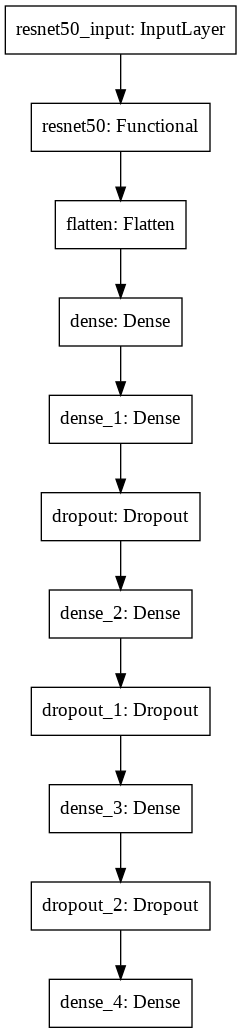

In [ ]:
plot_model(top_model)

In [ ]:
top_model.compile(optimizer =keras.optimizers.SGD(lr=0.001,momentum=.9,nesterov=False),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

In [ ]:
history_Res = top_model.fit_generator(
    train_generator,
    steps_per_epoch = len(train_generator)//32,
    epochs=500,
    validation_data = validation_generator,
    validation_steps = len(validation_generator)//32
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/500
39/39 [==============================] - 40s 80ms/step - loss: 2.9234 - accuracy: 0.0876 - val_loss: 2.3307 - val_accuracy: 0.1493
Epoch 2/500
39/39 [==============================] - 2s 48ms/step - loss: 2.3907 - accuracy: 0.1193 - val_loss: 2.2972 - val_accuracy: 0.1007
Epoch 3/500
39/39 [==============================] - 2s 53ms/step - loss: 2.3245 - accuracy: 0.1514 - val_loss: 2.3503 - val_accuracy: 0.0799
Epoch 4/500
39/39 [==============================] - 2s 51ms/step - loss: 2.2967 - accuracy: 0.1434 - val_loss: 2.3125 - val_accuracy: 0.1215
Epoch 5/500
39/39 [==============================] - 2s 54ms/step - loss: 2.2131 - accuracy: 0.1726 - val_loss: 2.4404 - val_accuracy: 0.1007
Epoch 6/500
39/39 [==============================] - 2s 52ms/step - loss: 2.1728 - accuracy: 0.2022 - val_loss: 2.4363 - val_accuracy: 0.0868
Epoch 7/500
39/39 [==============================] - 2s 53ms/step - loss: 2.1160 - accuracy: 0.2087 - val_loss: 2.5361 - val_accuracy: 0.1111
Epoch

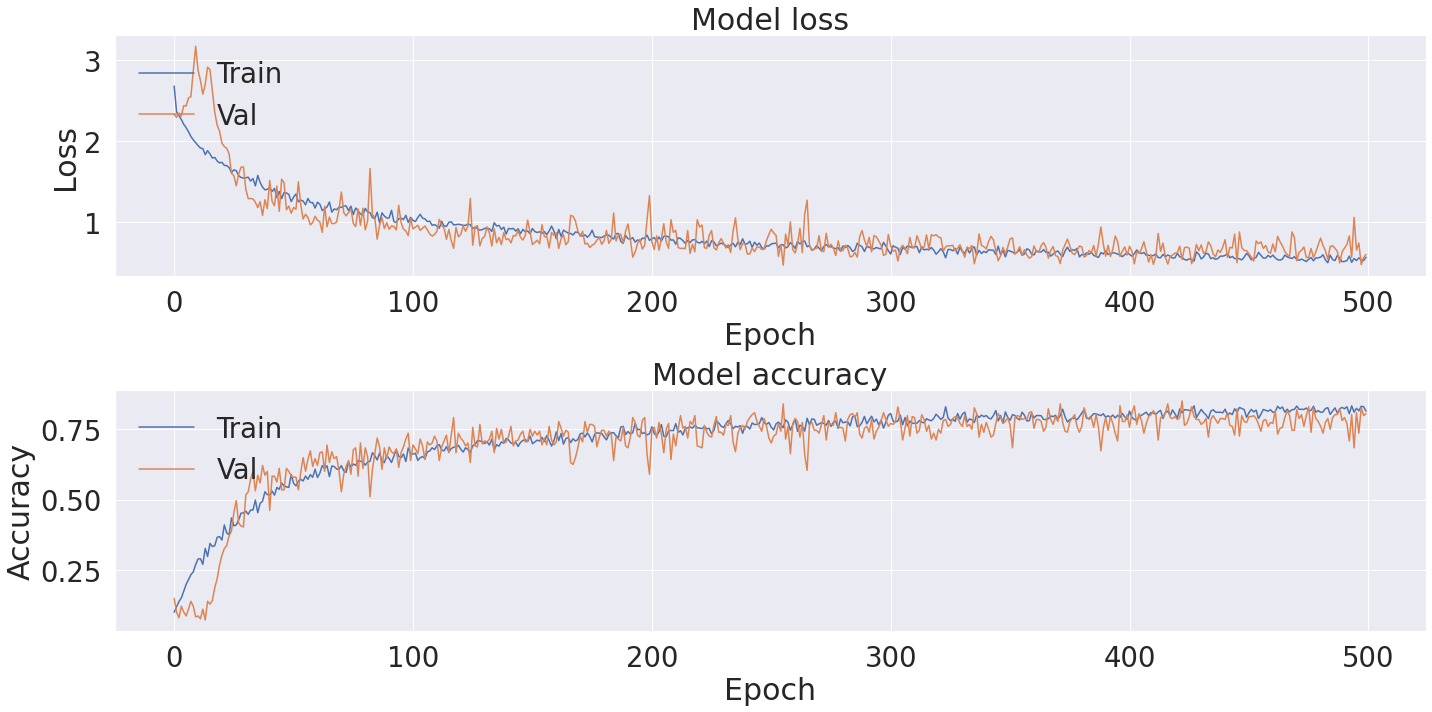

In [ ]:
f,ax = plt.subplots(2,1,figsize=(20,10))
ax[0].plot(history_Res.history['loss'])
ax[0].plot(history_Res.history['val_loss'])
ax[0].set_title('Model loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Val'], loc='upper left')

ax[1].plot(history_Res.history['accuracy'])
ax[1].plot(history_Res.history['val_accuracy'])
ax[1].set_title('Model accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Val'], loc='upper left')

f.tight_layout()
plt.show()

In [ ]:
top_model.evaluate(test_genrator)

313/313 [==============================] - 5s 16ms/step - loss: 0.6800 - accuracy: 0.7803


[0.6800446510314941, 0.7803000211715698]

#### ResNet trainable[@:] = True

In [ ]:
lrr= ReduceLROnPlateau(monitor='val_accuracy',
                       factor=.01, 
                       patience=3, 
                       min_lr=1e-5) 

In [ ]:
model2 = ResNet50(weights='imagenet',include_top=False,input_shape=(32, 32, 3))
model2.trainable = False

In [ ]:
top_model2 = keras.Sequential()
top_model2.add(model2)
top_model2.add(layers.GlobalAveragePooling2D())
top_model.add(layers.Dense(1024, activation='relu'))
top_model2.add(layers.Dense(10, activation='softmax'))

In [ ]:
top_model2.compile(optimizer =keras.optimizers.SGD(lr=0.001,momentum=.9,nesterov=False),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

In [ ]:
history_Res2_1 = top_model2.fit_generator(
    train_generator,
    steps_per_epoch = len(train_generator)//32,
    epochs=300,
    validation_data = validation_generator,
    validation_steps = len(validation_generator)//32
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/300
39/39 [==============================] - 5s 50ms/step - loss: 2.8219 - accuracy: 0.1066 - val_loss: 2.6624 - val_accuracy: 0.1111
Epoch 2/300
39/39 [==============================] - 1s 26ms/step - loss: 2.6092 - accuracy: 0.0914 - val_loss: 2.9660 - val_accuracy: 0.1111
Epoch 3/300
39/39 [==============================] - 1s 25ms/step - loss: 2.5889 - accuracy: 0.0910 - val_loss: 2.4665 - val_accuracy: 0.0764
Epoch 4/300
39/39 [==============================] - 1s 25ms/step - loss: 2.7562 - accuracy: 0.1198 - val_loss: 2.7114 - val_accuracy: 0.0938
Epoch 5/300
39/39 [==============================] - 1s 25ms/step - loss: 3.6260 - accuracy: 0.1073 - val_loss: 3.4049 - val_accuracy: 0.1146
Epoch 6/300
39/39 [==============================] - 1s 25ms/step - loss: 3.2125 - accuracy: 0.1390 - val_loss: 2.8206 - val_accuracy: 0.1667
Epoch 7/300
39/39 [==============================] - 1s 26ms/step - loss: 2.5771 - accuracy: 0.1673 - val_loss: 2.2603 - val_accuracy: 0.2153
Epoch 

In [ ]:
for layer in model2.layers[18:]:
  layer.trainable=True

In [ ]:
for layer in model2.layers:
  print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f7af3b05750> False
<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7f7aa36ae990> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7aa0c98fd0> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f7aa0c986d0> False
<tensorflow.python.keras.layers.core.Activation object at 0x7f7aa36be8d0> False
<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7f7aa1cffe50> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f7aa0c977d0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7aa1d64350> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f7aa0cb4990> False
<tensorflow.python.keras.layers.core.Activation object at 0x7f7aa0c97e90> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7aa0c9d7d0> False
<tensorflow.python.keras.laye

In [ ]:
top_model2.compile(optimizer =keras.optimizers.SGD(lr=0.001,momentum=.9,nesterov=False),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

In [ ]:
history_Res2_2 = top_model2.fit_generator(
    train_generator,
    steps_per_epoch = len(train_generator)//32,
    epochs=500,
    validation_data = validation_generator,
    validation_steps = len(validation_generator)//32
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/500
39/39 [==============================] - 5s 50ms/step - loss: 3.4784 - accuracy: 0.1088 - val_loss: 4.2635 - val_accuracy: 0.1389
Epoch 2/500
39/39 [==============================] - 1s 27ms/step - loss: 3.0532 - accuracy: 0.1334 - val_loss: 3.4197 - val_accuracy: 0.0799
Epoch 3/500
39/39 [==============================] - 1s 26ms/step - loss: 3.0614 - accuracy: 0.1366 - val_loss: 2.8242 - val_accuracy: 0.1319
Epoch 4/500
39/39 [==============================] - 1s 27ms/step - loss: 2.9098 - accuracy: 0.1428 - val_loss: 4.1227 - val_accuracy: 0.1146
Epoch 5/500
39/39 [==============================] - 1s 28ms/step - loss: 2.7895 - accuracy: 0.1622 - val_loss: 6.2502 - val_accuracy: 0.0868
Epoch 6/500
39/39 [==============================] - 1s 27ms/step - loss: 2.7796 - accuracy: 0.1735 - val_loss: 6.2779 - val_accuracy: 0.1181
Epoch 7/500
39/39 [==============================] - 1s 27ms/step - loss: 2.6721 - accuracy: 0.1667 - val_loss: 6.2740 - val_accuracy: 0.0799
Epoch 

In [ ]:
f,ax = plt.subplots(2,1,figsize=(20,10))
ax[0].plot(history_Res2_2.history['loss'])
ax[0].plot(history_Res2_2.history['val_loss'])
ax[0].set_title('Model loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Val'], loc='upper left')

ax[1].plot(history_Res2_2.history['accuracy'])
ax[1].plot(history_Res2_2.history['val_accuracy'])
ax[1].set_title('Model accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Val'], loc='upper left')

f.tight_layout()
plt.show()

In [ ]:
top_model2.evaluate(test_genrator)

157/157 [==============================] - 2s 15ms/step - loss: 3.0048 - accuracy: 0.1665


[3.0047619342803955, 0.1665000021457672]

#### ResNet self code
* Reference : https://eremo2002.tistory.com/76

In [ ]:
def conv1_layer(x):    
    x = ZeroPadding2D(padding=(3, 3))(x)
    x = Conv2D(64, (7, 7), strides=(2, 2))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = ZeroPadding2D(padding=(1,1))(x)
 
    return x   

In [ ]:
def conv2_layer(x):         
    x = MaxPooling2D((3, 3), 2)(x)     
 
    shortcut = x
 
    for i in range(3):
        if (i == 0):
            x = Conv2D(64, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
            
            x = Conv2D(64, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
 
            x = Conv2D(256, (1, 1), strides=(1, 1), padding='valid')(x)
            shortcut = Conv2D(256, (1, 1), strides=(1, 1), padding='valid')(shortcut)            
            x = BatchNormalization()(x)
            shortcut = BatchNormalization()(shortcut)
 
            x = Add()([x, shortcut])
            x = Activation('relu')(x)
            
            shortcut = x
 
        else:
            x = Conv2D(64, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
            
            x = Conv2D(64, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
 
            x = Conv2D(256, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)            
 
            x = Add()([x, shortcut])   
            x = Activation('relu')(x)  
 
            shortcut = x        
    
    return x

In [ ]:
def conv3_layer(x):        
    shortcut = x    
    
    for i in range(4):     
        if(i == 0):            
            x = Conv2D(128, (1, 1), strides=(2, 2), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)        
            
            x = Conv2D(128, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)  
 
            x = Conv2D(512, (1, 1), strides=(1, 1), padding='valid')(x)
            shortcut = Conv2D(512, (1, 1), strides=(2, 2), padding='valid')(shortcut)
            x = BatchNormalization()(x)
            shortcut = BatchNormalization()(shortcut)            
 
            x = Add()([x, shortcut])    
            x = Activation('relu')(x)    
 
            shortcut = x              
        
        else:
            x = Conv2D(128, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
            
            x = Conv2D(128, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
 
            x = Conv2D(512, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)            
 
            x = Add()([x, shortcut])     
            x = Activation('relu')(x)
 
            shortcut = x      
            
    return x

In [ ]:
def conv4_layer(x):
    shortcut = x        
  
    for i in range(6):     
        if(i == 0):            
            x = Conv2D(256, (1, 1), strides=(2, 2), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)        
            
            x = Conv2D(256, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)  
 
            x = Conv2D(1024, (1, 1), strides=(1, 1), padding='valid')(x)
            shortcut = Conv2D(1024, (1, 1), strides=(2, 2), padding='valid')(shortcut)
            x = BatchNormalization()(x)
            shortcut = BatchNormalization()(shortcut)
 
            x = Add()([x, shortcut]) 
            x = Activation('relu')(x)
 
            shortcut = x               
        
        else:
            x = Conv2D(256, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
            
            x = Conv2D(256, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
 
            x = Conv2D(1024, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)            
 
            x = Add()([x, shortcut])    
            x = Activation('relu')(x)
 
            shortcut = x      
 
    return x

In [ ]:
def conv5_layer(x):
    shortcut = x    
  
    for i in range(3):     
        if(i == 0):            
            x = Conv2D(512, (1, 1), strides=(2, 2), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)        
            
            x = Conv2D(512, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)  
 
            x = Conv2D(2048, (1, 1), strides=(1, 1), padding='valid')(x)
            shortcut = Conv2D(2048, (1, 1), strides=(2, 2), padding='valid')(shortcut)
            x = BatchNormalization()(x)
            shortcut = BatchNormalization()(shortcut)            
 
            x = Add()([x, shortcut])  
            x = Activation('relu')(x)      
 
            shortcut = x               
        
        else:
            x = Conv2D(512, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
            
            x = Conv2D(512, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
 
            x = Conv2D(2048, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)           
            
            x = Add()([x, shortcut]) 
            x = Activation('relu')(x)       
 
            shortcut = x                  
 
    return x

In [ ]:
def self_renet50():
  input_tensor = Input(shape=(32, 32, 3), dtype='float32', name='input')

  x = conv1_layer(input_tensor)
  x = conv2_layer(x)
  x = conv3_layer(x)
  x = conv4_layer(x)
  x = conv5_layer(x)
  
  x = GlobalAveragePooling2D()(x)
  x = Dense(1024, activation='relu')(x)
  output_tensor = Dense(10, activation='softmax')(x)
  
  model = Model(input_tensor, output_tensor, name='self_made_resnet')
  return model

In [ ]:
self_made_resnet = self_renet50()
self_made_resnet.summary()

Model: "self_made_resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 38, 38, 3)    0           input[0][0]                      
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 16, 16, 64)   9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 16, 16, 64)   256         conv2d[0][0]                     
___________________________________________________________________________________